<a href="https://colab.research.google.com/github/dsaldana/reinforcement-learning-course/blob/main/lab1-bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pylab inline
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [34]:
# Number of bandit arms
K = 5 # @param {"type":"integer"}
# Number of trials (time steps)
T = 100  # @param {"type":"integer"}

# Random seed
seed = 0

Text(0.5, 1.02, 'Unknown Reward Distributions for K Bandits')

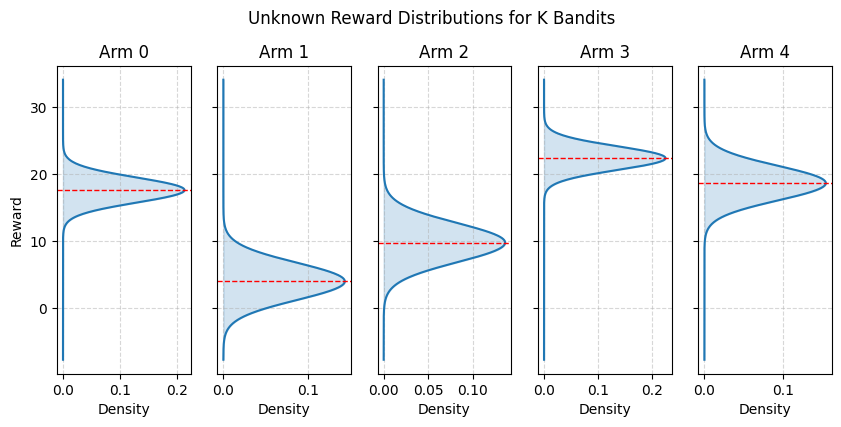

In [37]:
# Stattionary probability distribution for K bandits
np.random.seed(seed)
bandit_mean = 10 * np.random.normal(size=K)
bandit_std = np.random.uniform(1, 3, size=K)




###### Plot disttributions #######
fig, axes = plt.subplots(1, K, figsize=(2*K, 4), sharey=True)

x_min = bandit_mean.min() - 4 * bandit_std.max()
x_max = bandit_mean.max() + 4 * bandit_std.max()
x = np.linspace(x_min, x_max, 500)

for i, ax in enumerate(axes):
    y = norm.pdf(x, loc=bandit_mean[i], scale=bandit_std[i])
    ax.plot(y, x, color="C0")  # vertical orientation
    ax.fill_betweenx(x, 0, y, alpha=0.2, color="C0")
    ax.axhline(bandit_mean[i], color="r", linestyle="--", linewidth=1)  # mean
    ax.set_title(f"Arm {i}")
    ax.set_xlabel("Density")
    if i == 0:
        ax.set_ylabel("Reward")
    ax.grid(True, linestyle="--", alpha=0.5)
plt.suptitle("Unknown Reward Distributions for K Bandits", y=1.02)


Total reward is  1255.8042813463567


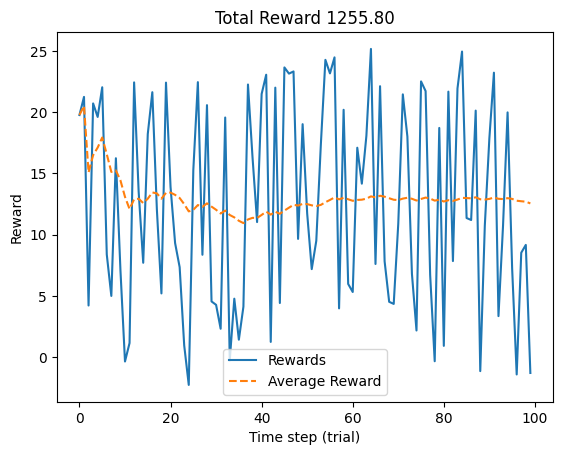

In [48]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a = np.random.randint(0, K-1)

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)
avg_reward = np.cumsum(rewards) / np.arange(1, len(rewards) + 1)

# Plot results
plot(rewards, label='Rewards')
plot(avg_reward, '--', label='Average Reward')
legend()
title("Rewards")
plt.title("Total Reward %.2f"%total)
xlabel("Time step (trial)")
ylabel("Reward")

print("Total reward is ", total)



## Exercise: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. The total reward should be higher than the

In [31]:
# Rewards
rewards = []

# For T trials, chose a random arm
for t in range(T):
  # Action: Choose a random arm
  a =  ############################ YOUR POLICY HERE #################

  # Reward
  r = np.random.normal(bandit_mean[a], bandit_std[a])
  rewards.append(r)


# Total reward
total = sum(rewards)

# Plot results
plot(rewards)
plt.title("Rewards")
xlabel("Time step (trial)")
ylabel("Reward")

print("Total reward is ", total)

## Exercise: Implement Your Own Bandit Policy

In the previous cells, we simulated a multi-armed bandit problem and observed the rewards obtained by choosing arms randomly. While this gives us a baseline, a random policy is unlikely to be the most effective way to maximize rewards.

Your task is to implement your own policy for selecting which bandit arm to pull at each time step `t`. Consider different strategies, such as:

*   **Greedy:** Always choose the arm with the highest estimated average reward.
*   **Epsilon-Greedy:** With a small probability epsilon, choose a random arm; otherwise, choose the greedy arm.
*   **Upper Confidence Bound (UCB):** Choose the arm that maximizes an upper confidence bound on the expected reward, balancing exploration and exploitation.
*   **Thompson Sampling:** Maintain a probability distribution over the expected reward for each arm and sample from these distributions to choose an arm.

You can also explore other policies or variations of these.

**Instructions:**

1.  Create new code cells below this one.
2.  Implement your chosen bandit policy within a loop that runs for `T` trials.
3.  Keep track of the rewards obtained at each time step.
4.  Calculate the total reward obtained by your policy.
5.  Compare the total reward of your policy to the total reward obtained by the random policy (which was printed in a previous cell).
6.  (Optional) Visualize the cumulative reward over time for your policy and compare it to the random policy.

In [38]:
!pip install mujoco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 18.5 MB/s eta 0:00:00


In [39]:
!pip install gymnasium
!pip install dm_control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.1 MB/s eta 0:00:00


In [40]:
import os
os.environ['MUJOCO_GL'] = 'egl'

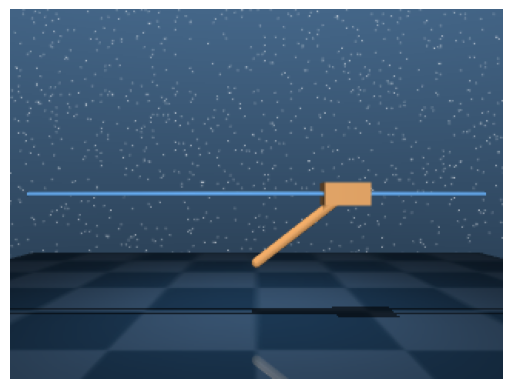

In [42]:
from dm_control import suite
import matplotlib.pyplot as plt
import numpy as np

# Load a task from the suite
env = suite.load('cartpole', 'swingup')

# Reset the environment
time_step = env.reset()

# Simulate for a few steps and render
frames = []
while not time_step.last():
    action = np.random.uniform(env.action_spec().minimum,
                               env.action_spec().maximum,
                               env.action_spec().shape)
    time_step = env.step(action)
    frames.append(env.physics.render(camera_id=0))

# Display the last frame (or you could display a sequence as a video)
plt.imshow(frames[-1])
plt.axis('off')
plt.show()

In [43]:
import imageio

# Define the filename for the video
video_filename = 'cartpole_swingup.mp4'

# Create a video writer
writer = imageio.get_writer(video_filename, fps=30) # You can adjust the fps

# Add each frame to the video
for frame in frames:
    writer.append_data(frame)

# Close the writer
writer.close()

print(f"Video saved as {video_filename}")

Video saved as cartpole_swingup.mp4


In [49]:
from IPython.display import Video

# Display the video
Video(video_filename)

KeyboardInterrupt: 

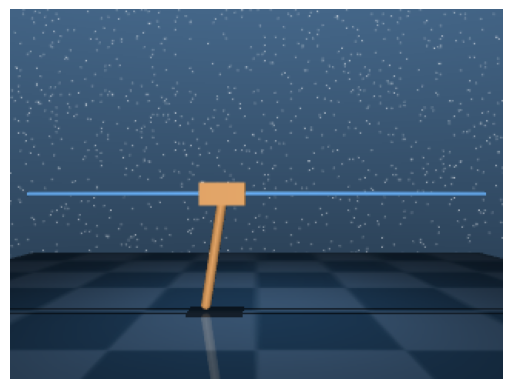

In [50]:
from IPython.display import display, clear_output
import time

# Display frames sequentially
for frame in frames:
    plt.imshow(frame)
    plt.axis('off')
    display(plt.gcf()) # Display the current figure
    clear_output(wait=True) # Clear the output to update the plot in place
    time.sleep(0.05) # Add a small delay (in seconds)

plt.close() # Close the final plot after the loop

In [ ]:
from matplotlib import animation
from IPython.display import HTML

# Create a figure and axes for the animation
fig, ax = plt.subplots()
plt.axis('off')

# Display the first frame
img = ax.imshow(frames[0])

# Function to update the frame for the animation
def animate(i):
    img.set_array(frames[i])
    return [img]

# Create the animation
anim = animation.FuncAnimation(fig, animate, frames=len(frames), interval=50, blit=True) # interval in milliseconds

# Display the animation
HTML(anim.to_html5_video())